In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [103]:
import joblib
import pandas as pd

# 定义 fixed_selector_transform 函数
def fixed_selector_transform(X):
    return X[:, sel_index]

# 加载外部测试集
external_test_set = pd.read_csv('Os-rdkit.csv')
X_external = external_test_set.drop(columns=['YRed/Ox', 'compound_name'])
y_external = external_test_set['YRed/Ox']

# 加载 pipeline
pipeline = joblib.load('Grdkit.joblib')  # 确保加载 pipeline
ext_pred = pipeline.predict(X_external.values)

In [104]:
results = pd.DataFrame({
    'Compound Name': compound_names,
    'Predicted Value': ext_pred,
    'Eexp': y_external
})

# 显示或保存结果
print(results)

        Compound Name  Predicted Value  Eexp
0            phen-III         0.552536  0.61
1              phen-I        -1.250081 -1.52
2             bpy-III         0.838123  0.57
3               bpy-I        -1.118541 -1.50
4            dMeO-III         0.009627  0.21
5              dMeO-I        -1.584073 -1.91
6         OspyMepyz-I        -1.729814 -1.90
7       OspyMepyz-III        -0.186542  0.59
8             Ostpy-I        -1.111171 -1.48
9           Ostpy-III         0.536689  0.77
10         Os-bMebi-I        -2.021815 -1.64
11       Os-bMebi-III        -0.461298  0.18
12          OsCltpy-I        -1.153116 -1.29
13        OsCltpy-III         0.376848  1.05
14     Os(tBu-tpy)2-I        -1.122228 -1.54
15   Os(tBu-tpy)2-III         0.487992  0.87
16      Os(Th-tpy)2-I        -1.141511 -1.45
17    Os(Th-tpy)2-III         0.439117  0.72
18        Os-pyMebi-I        -1.791183 -1.40
19      Os-pyMebi-III        -0.366193  0.31
20        Osdol-daf-I        -1.558105 -1.45
21      Os

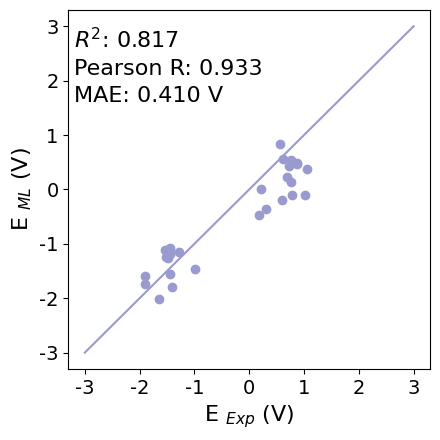

In [107]:
ext_r2 = r2_score(y_external,ext_pred)
ext_mae = mean_absolute_error(y_external,ext_pred)
ext_pearson_r = pearsonr(y_external,ext_pred)[0]

plt.figure(figsize=(4.5,4.5))

plt.scatter(y_external,ext_pred,c='#999ACD')

plt.text(-3.2,2.6,'$R^2$: %.3f'%ext_r2,fontsize=16)
plt.text(-3.2,2.1,'Pearson R: %.3f'%ext_pearson_r,fontsize=16)
plt.text(-3.2,1.6,'MAE: %.3f V'%ext_mae,fontsize=16)

plt.plot([-3,3],[-3,3],c='#999ACD')
plt.xlabel('E $_{Exp}$ (V)',fontsize=16)
plt.ylabel('E $_{ML}$ (V)',fontsize=16)
plt.xticks([-3, -2, -1, 0,1,2,3],list(map(str,[-3, -2, -1, 0,1,2,3])),fontsize=14)
plt.yticks([-3, -2, -1, 0,1,2,3],list(map(str,[-3, -2, -1, 0,1,2,3])),fontsize=14)
plt.tick_params(bottom='on',left='on')

plt.tight_layout()
